In [1]:
import xarray as xr
import numpy as np
from global_land_mask import globe

In [2]:
filename1 = 'MODEL.SST.HAD187001-198110.OI198111-202109.nc'
filename2 = 'MODEL.ICE.HAD187001-198110.OI198111-202109.nc'
ds1 = xr.open_dataset(filename1)
ds2 = xr.open_dataset(filename2)

In [3]:
lon = ds1.lon
lat = ds1.lat
lon2d, lat2d = np.meshgrid(lon,lat)
lon2d[lon2d>180] -= 360.
oceanmask = globe.is_ocean(lat2d, lon2d)

In [4]:
weights = xr.DataArray(
    np.cos(np.deg2rad(lat2d)),
    dims=('lat', 'lon'),
    coords={'lat': lat, 'lon': lon},
    attrs={'long_name': 'weights', 'units': 'none'},
    )

In [5]:
sst = ds1.SST
seaice = ds2.SEAICE
icefree = seaice<15
sst_masked = sst.where(oceanmask)
sst_icefree = sst_masked.where(icefree)
gasst = sst_masked.weighted(weights).mean(('lon', 'lat'))
gasst_icefree = sst_icefree.weighted(weights).mean(('lon', 'lat'))
gasst_ann = gasst.coarsen(time=12, boundary="trim").mean()
gasst_icefree_ann = gasst_icefree.coarsen(time=12, boundary="trim").mean()

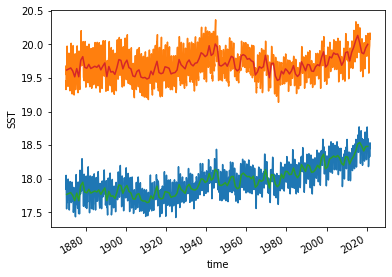

In [6]:
gasst.plot()
gasst_icefree.plot()
gasst_ann.plot()
gasst_icefree_ann.plot()

In [7]:
np.savez('gasst_ann.npz', gasst_ann=gasst_ann.values, gasst_icefree_ann=gasst_icefree_ann.values,
         time=gasst_ann.time.dt.year)